<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
import random
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [2]:
gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train.csv')
gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test.csv')
gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
display(gold_recovery_train.head())
gold_recovery_train.info()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [4]:
display(gold_recovery_test.head())
gold_recovery_test.info()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [5]:
display(gold_recovery_full.head())
gold_recovery_full.info()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

Пока что понятно только то, что признаков очень много и в них много пропусков :)
А вообще ситуация такая:

gold_recovery_train:
- выборка train состоит из 16860 объектов и 87 признаков;

gold_recovery_test:
- выборка test состоит из 5856 оьъектов и 52 признаков;

gold_recovery_full:
- выборка full состоит из 22716 объектов и 87 признаков;

In [6]:
C = gold_recovery_train['rougher.output.concentrate_au']
F = gold_recovery_train['rougher.input.feed_au']
T = gold_recovery_train['rougher.output.tail_au']

data_recovery = gold_recovery_train['rougher.output.recovery']

recovery = (C * (F - T))/(F * (C - T)) * 100

MAE = (abs(recovery - data_recovery)).sum() / len(recovery)
display(MAE)

8.00350954615662e-15

Ошибка крайне мала, поэтому можно сделать вывод, что эффективность обогащения рассчитана правильно.

In [7]:
train_cols = gold_recovery_train.columns
test_cols = gold_recovery_test.columns

cols_diff = train_cols.difference(test_cols)

display(cols_diff)

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

В тестовой выборке отсутствуют некоторые признаки "расчётные характеристики" (calculation) и "параметры продукта" (output).

In [8]:
#gold_recovery_train = gold_recovery_train.loc[:, list(gold_recovery_test.columns)]
#gold_recovery_train.info()

In [9]:
display(gold_recovery_train.isna().sum())

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

В условии к проекту нам указали, что соседние по времени параметры часто похожи, поэтому я предлагаю заполнить пропуски методом ffill, который заполняет пропуски последним действительным наблюдением.

In [10]:
gold_recovery_train['date'] = pd.to_datetime(gold_recovery_train['date'], format = '%Y-%m-%d %H:%M:%S')
gold_recovery_test['date'] = pd.to_datetime(gold_recovery_test['date'], format = '%Y-%m-%d %H:%M:%S')
gold_recovery_full['date'] = pd.to_datetime(gold_recovery_full['date'], format = '%Y-%m-%d %H:%M:%S')

gold_recovery_train.sort_values(by='date', inplace=True)
gold_recovery_test.sort_values(by='date', inplace=True)
gold_recovery_full.sort_values(by='date', inplace=True)

In [11]:
display(gold_recovery_train['rougher.output.recovery'].isna().sum())
display(gold_recovery_train['final.output.recovery'].isna().sum())
display(gold_recovery_full['rougher.output.recovery'].isna().sum())
display(gold_recovery_full['final.output.recovery'].isna().sum())

2573

1521

3119

1963

In [12]:
print('Размер трейна до удаления пропусков в целевом признаке', gold_recovery_train.shape)
print('Размер полной выборки до удаления пропусков в целевом признаке', gold_recovery_full.shape)
gold_recovery_train.dropna(subset=['rougher.output.recovery', 'final.output.recovery'], inplace=True)
gold_recovery_full.dropna(subset=['rougher.output.recovery', 'final.output.recovery'], inplace=True)
print('Размер трейна после удаления пропусков в целевом признаке', gold_recovery_train.shape)
print('Размер полной выборки после удаления пропусков в целевом признаке', gold_recovery_full.shape)

Размер трейна до удаления пропусков в целевом признаке (16860, 87)
Размер полной выборки до удаления пропусков в целевом признаке (22716, 87)
Размер трейна после удаления пропусков в целевом признаке (14149, 87)
Размер полной выборки после удаления пропусков в целевом признаке (19439, 87)


In [13]:
gold_recovery_train.fillna(method='ffill', inplace=True)
display(gold_recovery_train.isna().sum())
gold_recovery_train.info()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14149 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  14149 non-null datetime64[ns]
final.output.concentrate_ag                           14149 non-null float64
final.output.concentrate_pb                           14149 non-null float64
final.output.concentrate_sol                          14149 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14149 non-null float64
final.output.tail_sol                                 14149 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14149 non-null float64
primary_cleaner.input.depressant     

In [14]:
gold_recovery_full.fillna(method='ffill', inplace=True)
display(gold_recovery_full.isna().sum())
gold_recovery_full.info()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19439 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  19439 non-null datetime64[ns]
final.output.concentrate_ag                           19439 non-null float64
final.output.concentrate_pb                           19439 non-null float64
final.output.concentrate_sol                          19439 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19439 non-null float64
final.output.tail_pb                                  19439 non-null float64
final.output.tail_sol                                 19439 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19439 non-null float64
primary_cleaner.input.depressant     

In [15]:
display(gold_recovery_train.duplicated().sum())
display(gold_recovery_full.duplicated().sum())

0

0

Мы избавились от пропусков, дубликатов нет. Считаю, что данные предобработаны успешно.

### Вывод

- Мы убедились, что эффективность обогащения рассчитана правильно, с помощью MAE и формулы расчета recovery;
- Заполнили пропуски с помощью метода ffill;
- Убедились, что в выборке нет дубликатов.

## Анализ данных

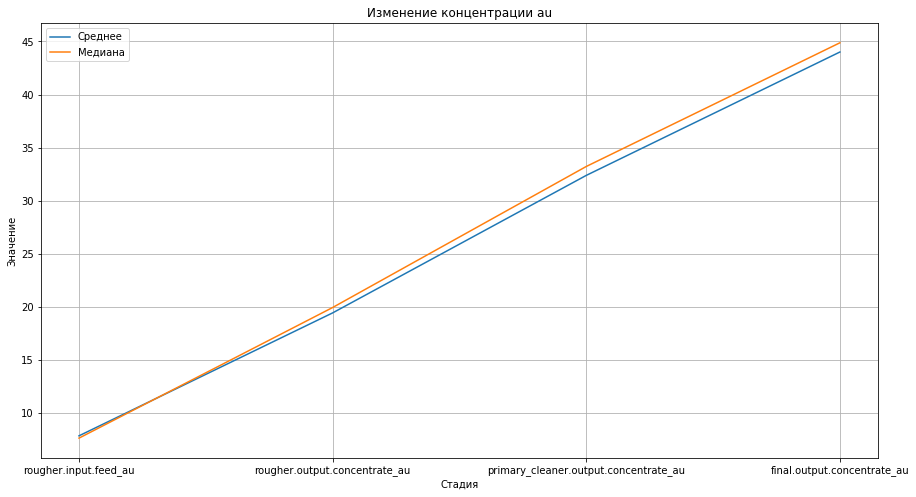

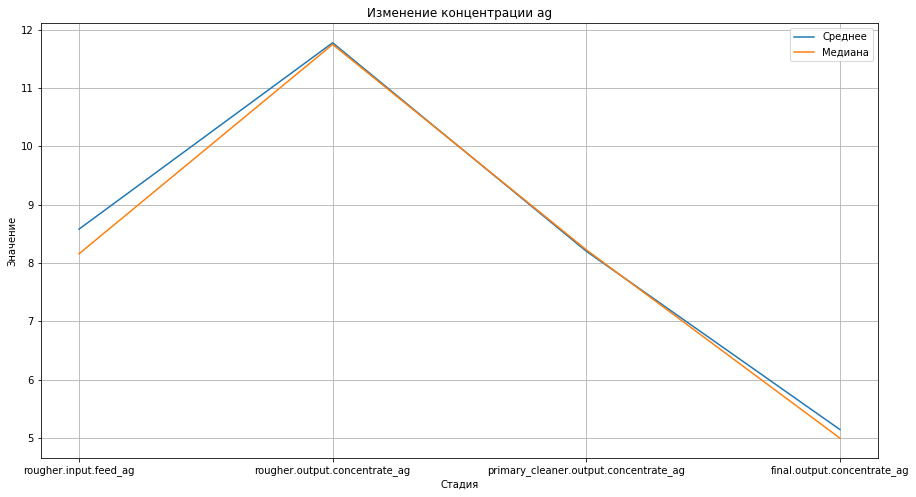

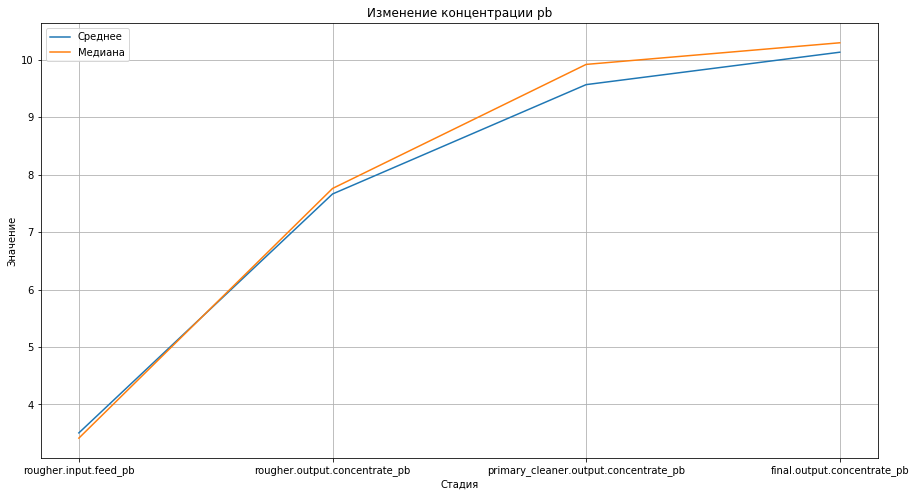

In [16]:
metals = ['au', 'ag', 'pb']
stages = ['rougher.input.feed_',
          'rougher.output.concentrate_',
          'primary_cleaner.output.concentrate_',
          'final.output.concentrate_']
for metal in metals:
    cols = [s + metal for s in stages]
    plt.figure(figsize = (15, 8))
    plt.plot(gold_recovery_train[cols].mean(), label='Среднее')
    plt.plot(gold_recovery_train[cols].median(), label='Медиана')
    
    plt.grid()
    plt.legend()
    plt.title('Изменение концентрации ' + metal)
    plt.xlabel('Стадия')
    plt.ylabel('Значение')
    plt.show()

По графикам мы видим:
- концентрация золота стремительно растёт в процессе обработки;
- концентрация серебра падает после флотации;
- концентрация свинца растет в процессе обработки.

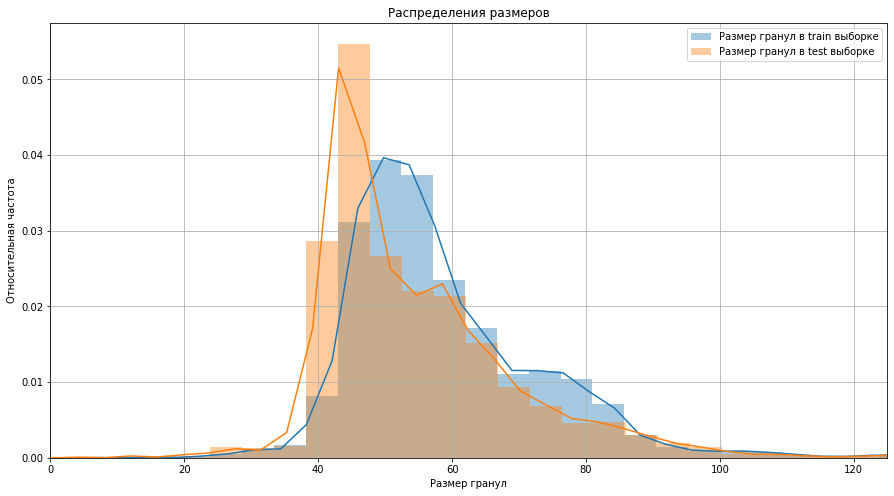

In [17]:
plt.figure(figsize=(15, 8))
sns.distplot(gold_recovery_train['rougher.input.feed_size'], bins = 100, label = 'Размер гранул в train выборке')
sns.distplot(gold_recovery_test['rougher.input.feed_size'], bins = 100, label = 'Размер гранул в test выборке')

plt.grid()
plt.xlim(0,125)
plt.legend()
plt.xlabel('Размер гранул');
plt.ylabel('Относительная частота');
plt.title('Распределения размеров');

Распределения размера гранул в обучающей и тестовой выборке схоже, поэтому этот признак не должен отрицательно повлиять на оценку модели.

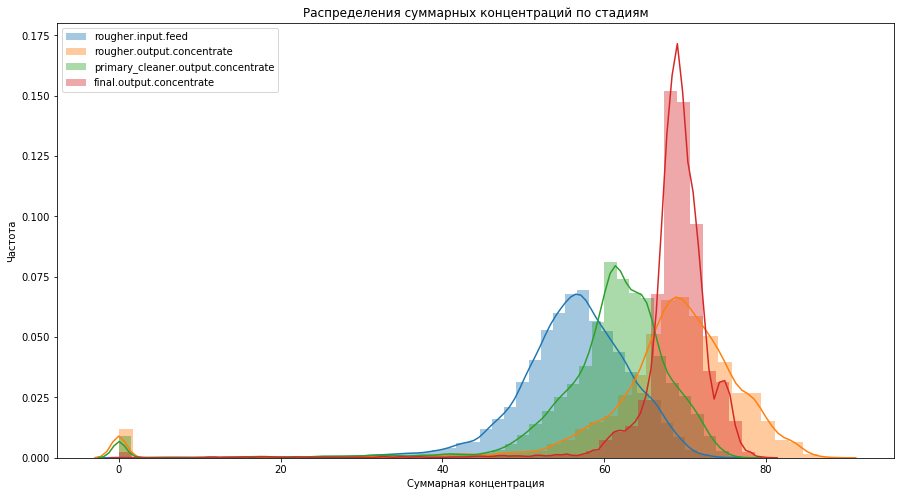

In [18]:
materials = metals + ['sol']

plt.figure(figsize = (15, 8))
for stage in stages:
    cols = [(stage + material) for material in materials]
    concentrate_sum = gold_recovery_train[cols].apply(np.sum, axis=1)
    sns.distplot(concentrate_sum, label = stage[:-1])
    
    plt.legend()
    plt.title('Распределения суммарных концентраций по стадиям')
    plt.xlabel('Суммарная концентрация')
    plt.ylabel('Частота')

По графику видно, что после флотации суммарная концентрация веществ увеличивается, затем после первичной очистки снижается, и после финальной обработки снова увеличивается.
Также мы можем заметить 0 значения, которые скорее всего являются аномалиями и их нужно удалить.

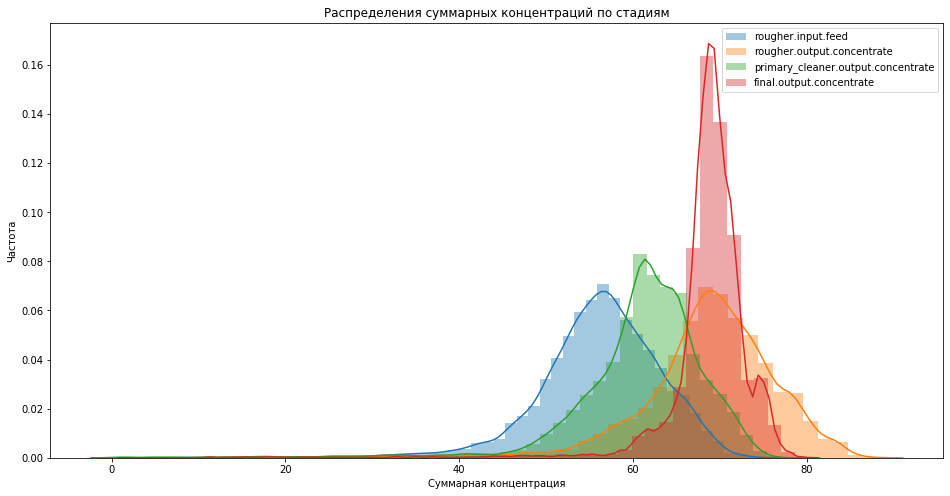

In [19]:
plt.figure(figsize = (16, 8))
for stage in stages:
    cols = [(stage + material) for material in materials]
    concentrate_sum = gold_recovery_train[cols].apply(np.sum, axis = 1)
    sns.distplot(concentrate_sum[concentrate_sum > 0.1], label = stage[:-1])
    
    plt.legend()
    plt.title('Распределения суммарных концентраций по стадиям')
    plt.xlabel('Суммарная концентрация')
    plt.ylabel('Частота')

Мы установили границу суммарной концентрации в 0.1 и успешно избавились от аномалий (при 0 аномалии оставались).

In [20]:
print('Размеры train выборки до удаления аномалий', gold_recovery_train.shape)
print('Размеры test выборки до удаления аномалий', gold_recovery_test.shape)
print('Размеры full выборки до удаления аномалий', gold_recovery_full.shape)
print()

for stage in stages:
    cols = [stage + material for material in materials]
    
    concentrate_sum_train = gold_recovery_train[cols].apply(np.sum, axis = 1)
    gold_train_ids = concentrate_sum_train[concentrate_sum_train > 0.1].index
    gold_recovery_train = gold_recovery_train.loc[gold_train_ids, :]

    concentrate_sum_full = gold_recovery_full[cols].apply(np.sum, axis = 1)
    gold_full_ids = concentrate_sum_full[concentrate_sum_full > 0.1].index
    gold_recovery_full = gold_recovery_full.loc[gold_full_ids, :]
    
    try:
        concentrate_sum_test = gold_recovery_test[cols].apply(np.sum, axis = 1)
        gold_test_ids = concentrate_sum_test[concentrate_sum_test > 0.1].index
        gold_recovery_test = gold_recovery_test.loc[gold_test_ids, :]
    except KeyError: #ошибка по отсутствию колонок
        pass
    
print('Размеры train выборки после удаления аномалий', gold_recovery_train.shape)
print('Размеры test выборки после удаления аномалий', gold_recovery_test.shape)
print('Размеры full выборки после удаления аномалий', gold_recovery_full.shape)

Размеры train выборки до удаления аномалий (14149, 87)
Размеры test выборки до удаления аномалий (5856, 53)
Размеры full выборки до удаления аномалий (19439, 87)

Размеры train выборки после удаления аномалий (13602, 87)
Размеры test выборки после удаления аномалий (5471, 53)
Размеры full выборки после удаления аномалий (18725, 87)


### Вывод

Мы проверили, как меняется концентрация металлов в процессе обработки:
- концентрация золота стремительно растёт в процессе обработки;
- концентрация серебра падает после флотации;
- концентрация свинца растет в процессе обработки.

Сравнили распределения размера гранул в обучающей и тестовой выборке. И выяснили, что они схожи, поэтому этот признак не должен отрицательно повлиять на оценку модели.

Выяснили, что суммарная концентрация веществ после флотации увеличивается, затем после первичной очистки снижается, и после финальной обработки снова увеличивается. Также мы удалили аномалии из датасетов.

## Модель

In [21]:
features_train = gold_recovery_train.loc[:, list(gold_recovery_test.columns)]
features_train = features_train.drop(columns=['date'])

target_cols = ['rougher.output.recovery', 'final.output.recovery']
target_train = gold_recovery_train[target_cols]

display(features_train.shape, target_train.shape)

(13602, 52)

(13602, 2)

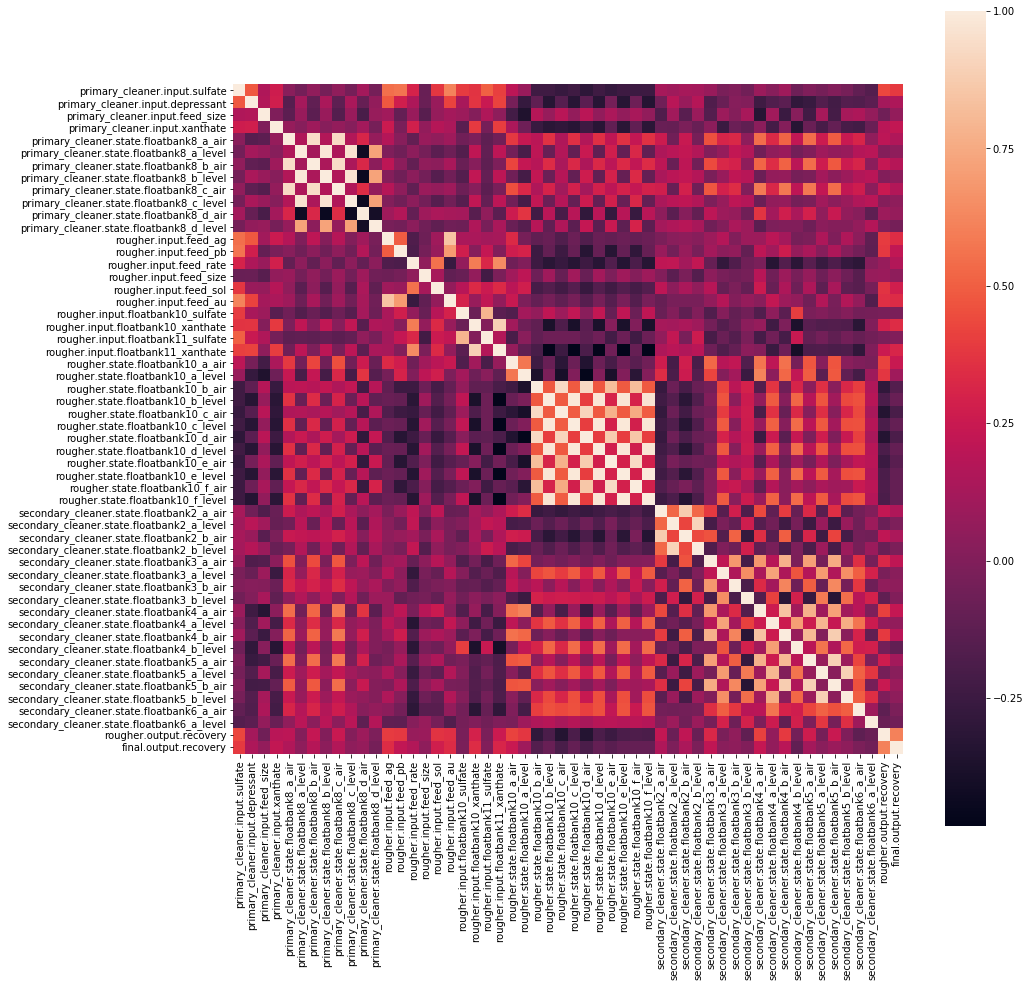

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(pd.concat([features_train, target_train], axis=1).corr(), square=True)
plt.show()

По тепловой карте мы видим, что есть сильнозависимые признаки, от которых мы можем избавиться.

In [23]:
corr_matrix = (pd.concat([features_train, target_train], axis = 1)).corr()
high_corr_features = []
train_corr = features_train.corr()

for col in features_train.columns[:-1]:
    train_corr.drop(index=col, inplace = True)
    corr_features = train_corr[train_corr[col]>0.9].index.tolist() + [col]
    corr_features_with_target = (
        corr_matrix
        .loc[corr_features, target_train.columns]
        .abs()
        .apply(np.sum, axis = 1)
        .sort_values(ascending=False)[1:]
    )
    
    high_corr_features.extend(corr_features_with_target.index.tolist())
    
display(set(high_corr_features))

{'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level',
 'secondary_cleaner.state.floatbank2_a_level'}

In [24]:
features_test = gold_recovery_full[gold_recovery_full['date'].
    isin(gold_recovery_test['date'])][gold_recovery_test.columns].drop(columns=['date'])
target_test = gold_recovery_full[gold_recovery_full['date'].
    isin(gold_recovery_test['date'])][target_cols]

display(features_test.shape, target_test.shape)

(5123, 52)

(5123, 2)

In [25]:
features_train_1 = features_train.drop(columns = high_corr_features)
features_test_1 = features_test.drop(columns = high_corr_features)

display(features_train_1.shape, features_test_1.shape)

(13602, 40)

(5123, 40)

In [26]:
display(features_train_1.head())

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,127.092003,10.128295,7.25,0.988759,-498.912140,1549.873901,1554.367432,-493.428131,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,999.706909,-404.066986,1602.375000,-451.294128,1404.472046,25.853109,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,125.629232,10.296251,7.25,1.002663,-500.904965,1575.994189,1574.479259,-498.931665,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583,11.971193,6.005766,11.996163,6.012594,1000.286398,-400.065196,1600.479580,-449.953649,1399.227084,25.880539,23.889530,-500.372428,23.970550,-500.085473,22.085714,-499.446897,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,123.819808,11.316280,7.25,0.991265,-499.997791,1602.003542,1599.541515,-499.827444,6.116455,2.159622,530.026610,57.510649,35.971630,6.362222,11.920603,6.197377,11.920305,6.204633,999.719565,-400.074028,1599.672797,-449.954185,1399.180945,26.005245,23.886657,-499.951928,23.913535,-499.442343,23.957717,-499.901982,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,122.270188,11.322140,7.25,0.996739,-500.951778,1600.304144,1600.449520,-500.052575,6.043309,2.037807,542.590390,57.792734,36.862241,6.118189,11.630094,6.203177,11.692450,6.196578,999.814770,-400.200179,1600.012842,-450.130127,1400.943157,25.942508,23.955516,-499.848796,23.966838,-500.008812,23.954443,-499.944710,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,117.988169,11.913613,7.25,1.009869,-498.975456,1599.581894,1602.649541,-500.593010,6.060915,1.786875,540.531893,56.047189,34.347666,5.663707,10.957755,6.198826,10.960521,6.194897,999.678690,-399.752729,1600.357732,-449.909799,1401.560902,26.024787,23.955345,-500.593614,23.985703,-500.083811,23.958945,-499.990309,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Мы избавились от мультиколлинеарность в наших данных. Масштабируем признаки и можно приступать к обучению моделей.

In [27]:
def sMAPE(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    smape = sum(2 * abs(y_true - y_pred) / (abs(y_true)+abs(y_pred)))*100/len(y_true)
    return smape

In [28]:
def final_sMAPE(y_true, y_pred):
    Y_true = np.array(y_true)
    Y_pred = np.array(y_pred)
    smape = sMAPE(Y_true, Y_pred)
    final_smape = 0.25 * smape[0] + 0.75 * smape[1]
    return final_smape

In [29]:
sMAPE_scor = make_scorer(final_sMAPE, greater_is_better = False)

In [30]:
scaler = StandardScaler()
scaler.fit(features_train_1)
features_train_scaled = scaler.transform(features_train_1)
features_test_scaled = scaler.transform(features_test_1)

In [31]:
lr = LinearRegression()
lr.fit(features_train_scaled, target_train)
lr_pred = lr.predict(features_test_scaled)
lr_smape = final_sMAPE(target_test, lr_pred)
display(lr_smape)

7.227155413628157

Линейная регрессия на тестовых данных показала нам sMAPE = 7.227%

In [32]:
rfr_params = {
            'n_estimators' : range(1, 51, 5),
            'max_depth' : range(1, 21, 2),
            #'min_samples_leaf' : range (1,15),
            #'min_samples_split' : [2,4],
            'random_state' : [1312]
        }

rfr = RandomForestRegressor()

def model_train(model, params, features, target):
    grid=(GridSearchCV(model,
                     param_grid=params,
                     scoring=sMAPE_scor,
                     cv=5)
         ).fit(features, target)
    return grid.best_params_

In [33]:
%%time
display(model_train(rfr, rfr_params, features_train_scaled, target_train))

CPU times: user 50min 23s, sys: 1.5 s, total: 50min 25s
Wall time: 50min 30s


{'max_depth': 3, 'n_estimators': 26, 'random_state': 1312}

In [34]:
rfr = RandomForestRegressor(max_depth=3, n_estimators=36, random_state=1312)
rfr.fit(features_train_scaled, target_train)
rfr_pred = rfr.predict(features_test_scaled)
rfr_smape = final_sMAPE(target_test, rfr_pred)
display(rfr_smape)

7.223382248574376

Случайный лес на тестовых данных показал результат sMAPE чуть лучше, чем линейная регрессия - 7,223%.

In [35]:
dummy_clf = DummyRegressor()
dummy_clf.fit(features_train_scaled, target_train)
pred_dummy = dummy_clf.predict(features_test_scaled)
dummy_smape = final_sMAPE(target_test, pred_dummy)
display(dummy_smape)

7.778875442919208

Проверка на адекватность показала, что наши модели предсказывают результаты лучше, чем простейший DummyRegressor.

### Вывод

- Мы избавились от лишних признаков, которых нет в тестовой выборке, в обучающей выборке;
- Избавились от мультиколлинеарности;
- Масштабировали признаки;
- Обучили 2 модели (линейная регрессия и случайный лес), проверили их на адекватность;
- Написали функцию для расчёта sMAPE;
- Линейная регрессия показала чуть большее значение sMAPE (7,227%) чем случайный лес(7,223%), поэтому обе модели могут быть использованы.

## Вывод

**Ход работы:**
- Мы убедились, что эффективность обогащения рассчитана правильно, с помощью MAE и формулы расчета recovery;
- Заполнили пропуски в данных с помощью метода ffill;
- Убедились, что в выборке нет дубликатов;
- Мы проверили, как меняется концентрация металлов в процессе обработки:
  - концентрация золота стремительно растёт в процессе обработки;
  - концентрация серебра падает после флотации;
  - концентрация свинца растет в процессе обработки.
- Сравнили распределения размера гранул в обучающей и тестовой выборке, и выяснили, что они схожи, поэтому этот признак не должен отрицательно повлиять на оценку модели;
- Выяснили, что суммарная концентрация веществ после флотации увеличивается, затем после первичной очистки снижается, и после финальной обработки снова увеличивается;
- Удалили аномалии из датасетов.
- Избавились от лишних признаков, которых нет в тестовой выборке, в обучающей выборке;
- Избавились от мультиколлинеарности;
- Масштабировали признаки;

**Результаты работы:**
- Обучили 2 модели (линейная регрессия и случайный лес), проверили их на адекватность;
- Написали функцию для расчёта sMAPE;
- Линейная регрессия показала меньшее значение sMAPE (7,227%) чем случайный лес (7,223%).